# VirES - access to Swarm virtual observatories data

This notebook demonstrates access to Swarm VOBS_1M and V_OBS_4M virtual observatory data via VirES for Swarm API.

Avalable collections

| Collection Name | Description |
|---|---|
| `SW_OPER_VOBS_1M_2_` | 1 month data from all virtual observatories |
| `SW_OPER_VOBS_1M_2_:<code>` | 1 month data from one selected virtual observatory |
| `SW_OPER_VOBS_4M_2_` | 4 month data from all virtual observatories |
| `SW_OPER_VOBS_4M_2_:<code>` | 4 months data from one selected virtual observatory |

The `<code>` is a 7-letter "virtual observatories" identifier, unique for each of the 300 "virtual observatories".

Avalable variables (same for all collections)                          

| Variable | Unit | Dimension | Description | 
|---|---|---|---|
| `SiteCode` | $-$ | char [7] | virtual observatory identifier |
| `Timestamp` | $-$ | scalar | UTC time of observation |
| `Latitude` | $\text{deg}$ | scalar | ITRF geocentric latitude |
| `Longitude` | $\text{deg}$ | scalar | ITRF geocentric longitude |
| `Radius` | $\text{m}$ | scalar | ITRF geocentric radius |
| `B_CF` | $\text{nT}$ | vector [3] | Core magnetic field vector in ITRF NEC frame. |
| `B_OB` | $\text{nT}$ | vector [3] | Observed magnetic field vector in ITRF NEC frame. |
| `sigma_CF` | $\text{nT}$ | vector [3] | Estimated error of the core magnetic field vector in ITRF NEC frame. |
| `sigma_OB` | $\text{nT}$ | vector [3] | Estimated error of the observed magnetic field vector in ITRF NEC frame. |

The secular variation variables `B_SV` and `sigma_SV` not available in the currently used demostration dataset.

In [1]:
# pre-release setup

! pip install --upgrade 'git+https://github.com/ESA-VirES/VirES-Python-Client@swarm_gvo#egg=viresclient'

VOBS_VARIABLES = [
    'SiteCode',
    'B_CF', 'B_OB', #'B_SV',
    'sigma_CF', 'sigma_OB', #'sigma_SV',
]

VOBS_1M_COLLECTION = 'SW_OPER_VOBS_1M_2_'
VOBS_4M_COLLECTION = 'SW_OPER_VOBS_4M_2_'

VOBS_SITES = [
    'N90E000',
    'N77W026', 'N77W077', 'N77W129',
    'N77E026', 'N77E077', 'N77E129', 'N77E180',
    'N65W024', 'N65W051', 'N65W079', 'N65W107', 'N65W135', 'N65W162',
    'N65E004', 'N65E032', 'N65E059', 'N65E087', 'N65E115', 'N65E142', 'N65E170',
    'N54W003', 'N54W023', 'N54W043', 'N54W063', 'N54W083', 'N54W103', 'N54W123', 'N54W143', 'N54W163',
    'N54E017', 'N54E037', 'N54E057', 'N54E077', 'N54E097', 'N54E117', 'N54E137', 'N54E157', 'N54E177',
    'N42W007', 'N42W023', 'N42W038', 'N42W054', 'N42W069', 'N42W085', 'N42W101', 'N42W116', 'N42W132', 'N42W148', 'N42W163', 'N42W179',
    'N42E009', 'N42E024', 'N42E040', 'N42E056', 'N42E071', 'N42E087', 'N42E103', 'N42E118', 'N42E134', 'N42E150', 'N42E165',
    'N30W009', 'N30W022', 'N30W036', 'N30W049', 'N30W062', 'N30W076', 'N30W089', 'N30W102', 'N30W116', 'N30W129', 'N30W142', 'N30W156', 'N30W169',
    'N30E004', 'N30E018', 'N30E031', 'N30E044', 'N30E058', 'N30E071', 'N30E084', 'N30E098', 'N30E111', 'N30E124', 'N30E138', 'N30E151', 'N30E164', 'N30E178',
    'N18W010', 'N18W022', 'N18W034', 'N18W046', 'N18W058', 'N18W070', 'N18W082', 'N18W094', 'N18W106', 'N18W118', 'N18W130', 'N18W142', 'N18W154', 'N18W166', 'N18W178',
    'N18E002', 'N18E014', 'N18E026', 'N18E038', 'N18E050', 'N18E062', 'N18E074', 'N18E086', 'N18E098', 'N18E110', 'N18E122', 'N18E134', 'N18E146', 'N18E158', 'N18E170',
    'N06W010', 'N06W021', 'N06W033', 'N06W045', 'N06W056', 'N06W068', 'N06W079', 'N06W091', 'N06W103', 'N06W114', 'N06W126', 'N06W138', 'N06W149', 'N06W161', 'N06W172',
    'N06E002', 'N06E013', 'N06E025', 'N06E037', 'N06E048', 'N06E060', 'N06E072', 'N06E083', 'N06E095', 'N06E106', 'N06E118', 'N06E130', 'N06E141', 'N06E153', 'N06E164', 'N06E176',
    'S06W004', 'S06W016', 'S06W027', 'S06W039', 'S06W050', 'S06W062', 'S06W074', 'S06W085', 'S06W097', 'S06W108', 'S06W120', 'S06W132', 'S06W143', 'S06W155', 'S06W167', 'S06W178',
    'S06E008', 'S06E019', 'S06E031', 'S06E042', 'S06E054', 'S06E066', 'S06E077', 'S06E089', 'S06E101', 'S06E112', 'S06E124', 'S06E135', 'S06E147', 'S06E159', 'S06E170',
    'S18W003', 'S18W015', 'S18W027', 'S18W039', 'S18W051', 'S18W063', 'S18W075', 'S18W087', 'S18W099', 'S18W111', 'S18W123', 'S18W135', 'S18W147', 'S18W159', 'S18W171',
    'S18E009', 'S18E021', 'S18E033', 'S18E045', 'S18E057', 'S18E069', 'S18E081', 'S18E093', 'S18E105', 'S18E117', 'S18E129', 'S18E141', 'S18E153', 'S18E165', 'S18E177',
    'S30W001', 'S30W015', 'S30W028', 'S30W041', 'S30W055', 'S30W068', 'S30W081', 'S30W095', 'S30W108', 'S30W121', 'S30W135', 'S30W148', 'S30W161', 'S30W175',
    'S30E012', 'S30E025', 'S30E039', 'S30E052', 'S30E065', 'S30E079', 'S30E092', 'S30E105', 'S30E119', 'S30E132', 'S30E145', 'S30E159', 'S30E172',
    'S42W014', 'S42W030', 'S42W046', 'S42W061', 'S42W077', 'S42W093', 'S42W108', 'S42W124', 'S42W140', 'S42W155', 'S42W171',
    'S42E001', 'S42E017', 'S42E033', 'S42E048', 'S42E064', 'S42E079', 'S42E095', 'S42E111', 'S42E126', 'S42E142', 'S42E158', 'S42E173',
    'S54W014', 'S54W034', 'S54W054', 'S54W074', 'S54W094', 'S54W114', 'S54W134', 'S54W154', 'S54W174',
    'S54E006', 'S54E026', 'S54E046', 'S54E066', 'S54E086', 'S54E106', 'S54E126', 'S54E146', 'S54E166',
    'S65W041', 'S65W069', 'S65W096', 'S65W124', 'S65W152', 'S65W179',
    'S65E014', 'S65E042', 'S65E070', 'S65E098', 'S65E125', 'S65E153', 'S65W013',
    'S77W063', 'S77W114', 'S77W166',
    'S77E040', 'S77E092', 'S77E143', 'S77W011',
    'S90E000'
]

from viresclient import SwarmRequest

SwarmRequest.OBS_COLLECTIONS += [VOBS_1M_COLLECTION, VOBS_4M_COLLECTION]
SwarmRequest.PRODUCT_VARIABLES['VOBS_1M'] = VOBS_VARIABLES
SwarmRequest.PRODUCT_VARIABLES['VOBS_4M'] = VOBS_VARIABLES
SwarmRequest.COLLECTIONS['VOBS_1M'] = [VOBS_1M_COLLECTION] + [f'{VOBS_1M_COLLECTION}:{site}' for site in VOBS_SITES]
SwarmRequest.COLLECTIONS['VOBS_4M'] = [VOBS_4M_COLLECTION] + [f'{VOBS_4M_COLLECTION}:{site}' for site in VOBS_SITES]
SwarmRequest.COLLECTION_SAMPLING_STEPS['VOBS_1M'] = 'P31D'
SwarmRequest.COLLECTION_SAMPLING_STEPS['VOBS_4M'] = 'P122D'

  Cloning https://github.com/ESA-VirES/VirES-Python-Client (to revision swarm_gvo) to /tmp/pip-install-mq0kewo3/viresclient
  Created wheel for viresclient: filename=viresclient-0.7.1-py3-none-any.whl size=67589 sha256=31a4244d533ddac6e268c131743ad8edc77e2c52627f47491a320be64eb9a178
  Stored in directory: /tmp/pip-ephem-wheel-cache-g3sou163/wheels/d3/d4/f3/ed4b44570cfc4c1529d54fcdf6c4fba7573c4becadc76e9c64
Successfully built viresclient
  Attempting uninstall: viresclient
    Found existing installation: viresclient 0.7.1
    Uninstalling viresclient-0.7.1:
      Successfully uninstalled viresclient-0.7.1
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
from matplotlib.pyplot import figure, subplot, show
from viresclient import SwarmRequest

#server_url = None # default VirES server
server_url = 'https://staging.viresdisc.vires.services/ows' # DISC server

request = SwarmRequest(server_url)

## VOBS_1M - list of virtual observatories

In [3]:
observatories = request.available_observatories('SW_OPER_VOBS_1M_2_', details=True)

print('Avaiable observatories and temporal extent of their data:')
print('site\t\tstartTime\t\t\tendTime')
for item in zip(observatories['site'], observatories['startTime'], observatories['endTime']):
    print("%s\t\t%s\t%s" % item)

Avaiable observatories and temporal extent of their data:
site		startTime			endTime
N06E002		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E013		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E025		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E037		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E048		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E060		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E072		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E083		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E095		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E106		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E118		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E130		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E141		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E153		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E164		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N

## VOBS_1M - all virtual observatories

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.559MB)


<xarray.Dataset>
Dimensions:     (B_CF_dim1: 3, B_OB_dim1: 3, Timestamp: 3600, sigma_CF_dim1: 3, sigma_OB_dim1: 3)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-15T12:00:00 ... 2016-12-15T12:00:00
Dimensions without coordinates: B_CF_dim1, B_OB_dim1, sigma_CF_dim1, sigma_OB_dim1
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'N90E000' 'N77E026' ... 'S77W011' 'S90E000'
    B_OB        (Timestamp, B_OB_dim1) float64 -4.611e+04 ... -6.675e+03
    QDLat       (Timestamp) float64 83.79 74.1 72.54 ... -62.84 -65.49 -74.87
    sigma_CF    (Timestamp, sigma_CF_dim1) float64 9.189 8.327 ... 19.89 12.1
    Longitude   (Timestamp) float64 0.0 25.71 77.14 128.6 ... -62.67 -11.24 0.0
    B_CF        (Timestamp, B_CF_dim1) float64 -4.608e+04 ... -6.68e+03
    QDLon       (Timestamp) float64 170.7 115.8 155.2 ... 12.73 35.88 17.16
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.86

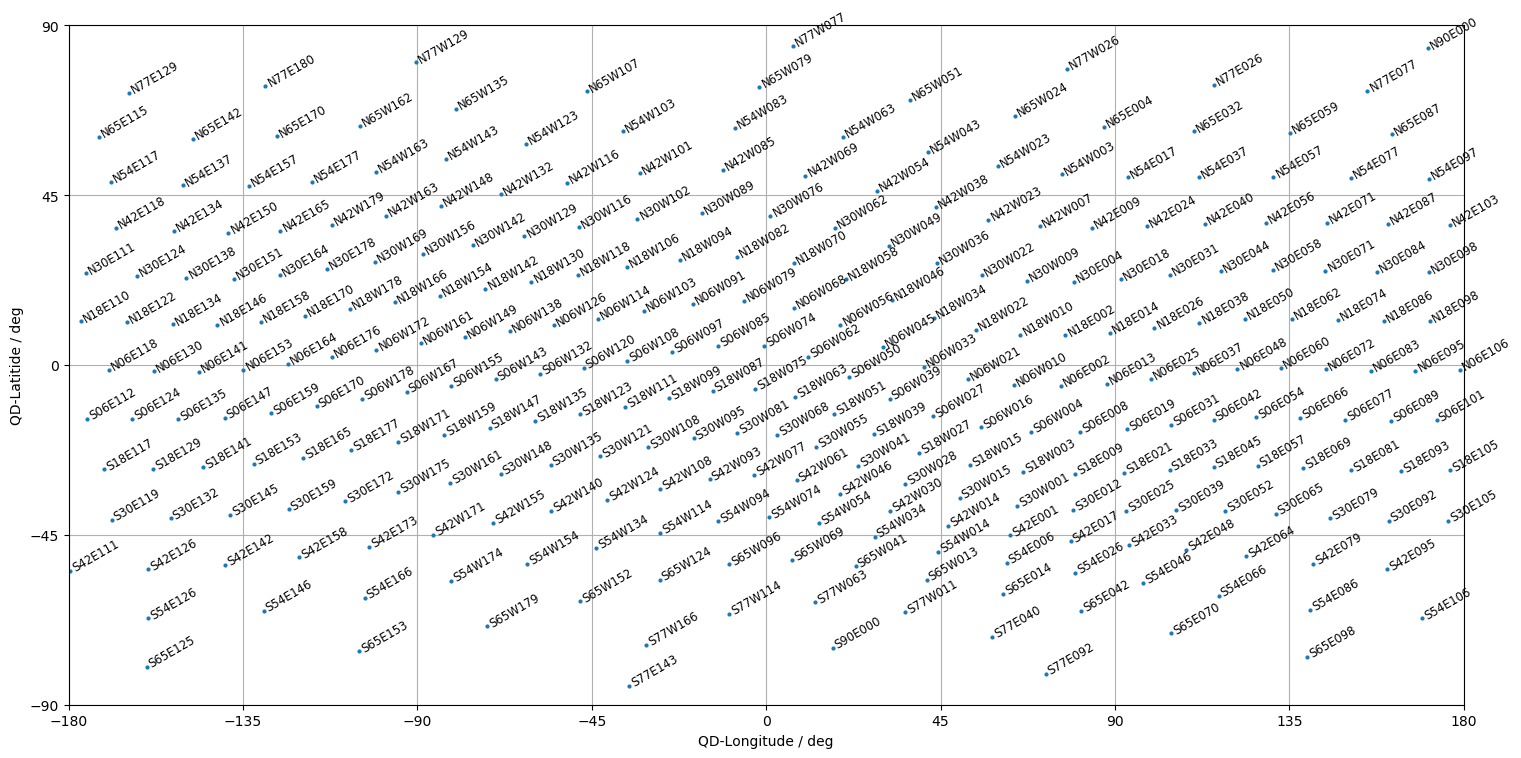

In [4]:
request = SwarmRequest(server_url)
request.set_collection('SW_OPER_VOBS_1M_2_')
request.set_products(
    measurements=VOBS_VARIABLES,
    auxiliaries=['QDLat', 'QDLon'],
)
data = request.get_between(
    start_time='2016-01-01T00:00:00Z',
    end_time='2017-01-01T00:00:00Z',
    asynchronous=True,
).as_xarray()

# ---------

print(data)

%matplotlib inline
fig = figure(figsize=(18, 9), dpi=100)
ax = subplot(1, 1, 1)

times = data['Timestamp'].values
idx = (times == times.max()).nonzero()[0]

for qdlat, qdlon, code in zip(data['QDLat'].values[idx], data['QDLon'].values[idx], data['SiteCode'].values[idx]):
    ax.plot(qdlon, qdlat, '.', ms=4, color='tab:blue')
    ax.text(qdlon, qdlat, code, fontsize='small', rotation=30)

ax.set_yticks([-90, -45, 0, +45, +90])
ax.set_ylim([-90, +90])
ax.set_ylabel('QD-Latitide / deg')
ax.set_xticks([-180, -135, -90, -45, 0, +45, +90, +135, +180])
ax.set_xlim([-180, +180])
ax.set_xlabel('QD-Longitude / deg')
ax.grid()
show()

## VOBS_4M - list of virtual observatories

In [5]:
observatories = request.available_observatories('SW_OPER_VOBS_4M_2_', details=True)

print('Avaiable observatories and temporal extent of their data:')
print('site\t\tstartTime\t\t\tendTime')
for item in zip(observatories['site'], observatories['startTime'], observatories['endTime']):
    print("%s\t\t%s\t%s" % item)

Avaiable observatories and temporal extent of their data:
site		startTime			endTime
N06E002		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E013		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E025		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E037		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E048		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E060		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E072		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E083		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E095		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E106		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E118		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E130		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E141		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E153		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N06E164		2014-03-01T12:00:00+00:00	2020-11-01T12:00:00+00:00
N

## VOBS_4M - all virtual observatories

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.159MB)


<xarray.Dataset>
Dimensions:     (B_CF_dim1: 3, B_OB_dim1: 3, Timestamp: 900, sigma_CF_dim1: 3, sigma_OB_dim1: 3)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-03-01T12:00:00 ... 2016-11-01T12:00:00
Dimensions without coordinates: B_CF_dim1, B_OB_dim1, sigma_CF_dim1, sigma_OB_dim1
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'N90E000' 'N77E026' ... 'S77W011' 'S90E000'
    B_OB        (Timestamp, B_OB_dim1) float64 -4.61e+04 -1.171e+03 ... nan nan
    QDLat       (Timestamp) float64 83.79 74.11 72.55 ... -62.83 -65.48 -74.86
    sigma_CF    (Timestamp, sigma_CF_dim1) float64 4.754 4.853 3.885 ... nan nan
    Longitude   (Timestamp) float64 0.0 25.71 77.14 128.6 ... -62.67 -11.24 0.0
    B_CF        (Timestamp, B_CF_dim1) float64 -4.609e+04 -1.168e+03 ... nan nan
    QDLon       (Timestamp) float64 170.7 115.8 155.2 ... 12.73 35.88 17.16
    Radius      (Timestamp) float64 6.861e+06 6.861e+06

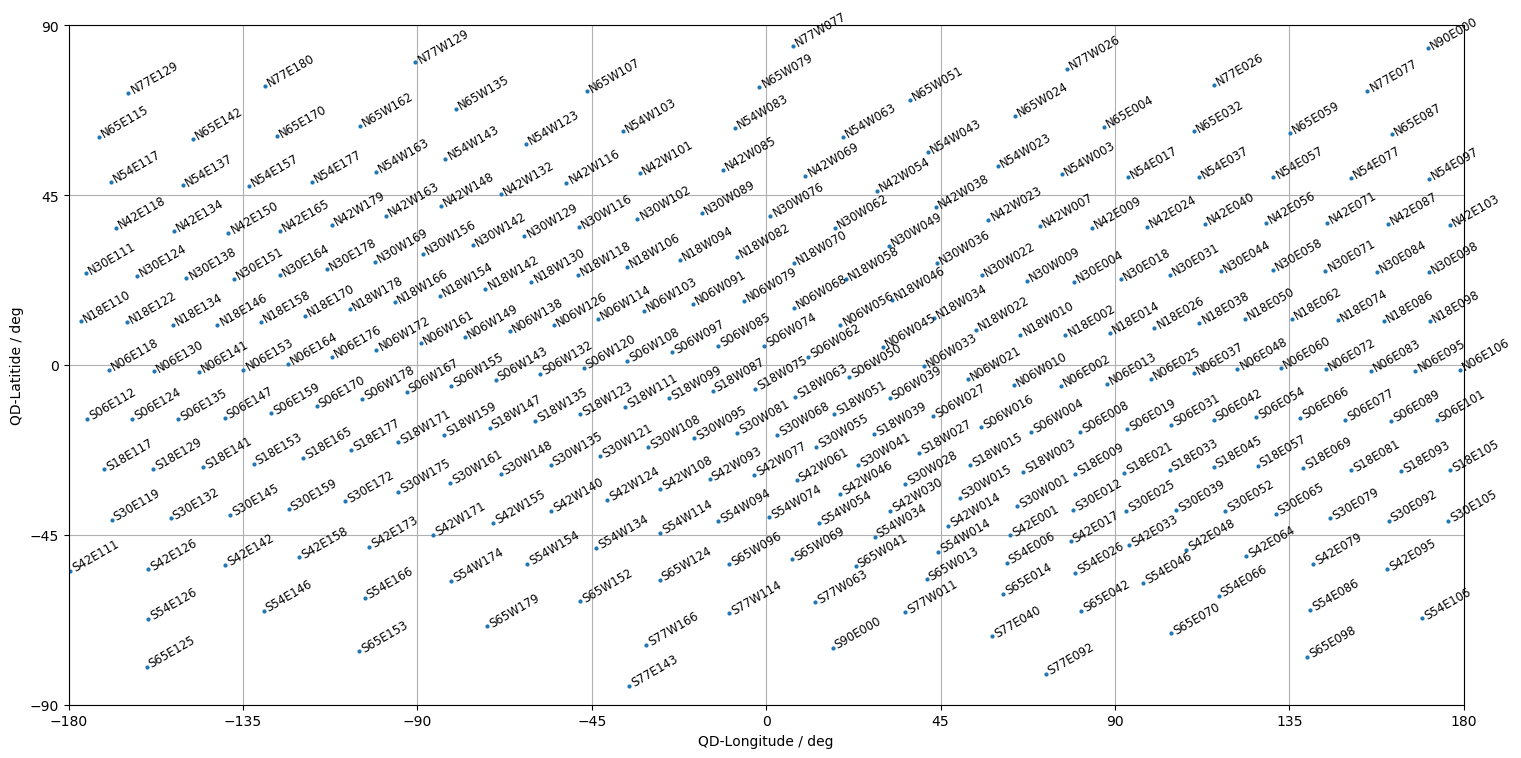

In [6]:
request = SwarmRequest(server_url)
request.set_collection('SW_OPER_VOBS_4M_2_')
request.set_products(
    measurements=VOBS_VARIABLES,
    auxiliaries=['QDLat', 'QDLon'],
)
data = request.get_between(
    start_time='2016-01-01T00:00:00Z',
    end_time='2017-01-01T00:00:00Z',
    asynchronous=True,
).as_xarray()

# ---------

print(data)

%matplotlib inline
fig = figure(figsize=(18, 9), dpi=100)
ax = subplot(1, 1, 1)

times = data['Timestamp'].values
idx = (times == times.max()).nonzero()[0]

for qdlat, qdlon, code in zip(data['QDLat'].values[idx], data['QDLon'].values[idx], data['SiteCode'].values[idx]):
    ax.plot(qdlon, qdlat, '.', ms=4, color='tab:blue')
    ax.text(qdlon, qdlat, code, fontsize='small', rotation=30)

ax.set_yticks([-90, -45, 0, +45, +90])
ax.set_ylim([-90, +90])
ax.set_ylabel('QD-Latitide / deg')
ax.set_xticks([-180, -135, -90, -45, 0, +45, +90, +135, +180])
ax.set_xlim([-180, +180])
ax.set_xlabel('QD-Longitude / deg')
ax.grid()
show()

## VOBS_1M vs VOBS_4M - one virtual observatory

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.106MB)


<xarray.Dataset>
Dimensions:     (B_CF_dim1: 3, B_OB_dim1: 3, Timestamp: 82, sigma_CF_dim1: 3, sigma_OB_dim1: 3)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2013-12-15T12:00:00 ... 2020-09-15T12:00:00
Dimensions without coordinates: B_CF_dim1, B_OB_dim1, sigma_CF_dim1, sigma_OB_dim1
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    B_OB        (Timestamp, B_OB_dim1) float64 4.068e+04 ... 1.115e+04
    QDLat       (Timestamp) float64 -65.77 -65.78 -65.78 ... -65.91 -65.91
    sigma_CF    (Timestamp, sigma_CF_dim1) float64 nan nan nan ... 2.358 5.248
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_CF        (Timestamp, B_CF_dim1) float64 nan nan ... -7.144e+03 1.115e+04
    QDLon       (Timestamp) float64 -9.436 -9.435 -9.434 ... -9.66 -9.665 -9.67
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.8

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.106MB)
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<xarray.Dataset>
Dimensions:     (B_CF_dim1: 3, B_OB_dim1: 3, Timestamp: 21, sigma_CF_dim1: 3, sigma_OB_dim1: 3)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2014-03-01T12:00:00 ... 2020-11-01T12:00:00
Dimensions without coordinates: B_CF_dim1, B_OB_dim1, sigma_CF_dim1, sigma_OB_dim1
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    B_OB        (Timestamp, B_OB_dim1) float64 4.066e+04 ... 1.114e+04
    QDLat       (Timestamp) float64 -65.78 -65.78 -65.79 ... -65.91 -65.92
    sigma_CF    (Timestamp, sigma_CF_dim1) float64 9.204 3.435 ... 3.435 7.412
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_CF        (Timestamp, B_CF_dim1) float64 4.064e+04 ... 1.114e+04
    QDLon       (Timestamp) float64 -9.433 -9.428 -9.423 ... -9.658 -9.678
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    sig

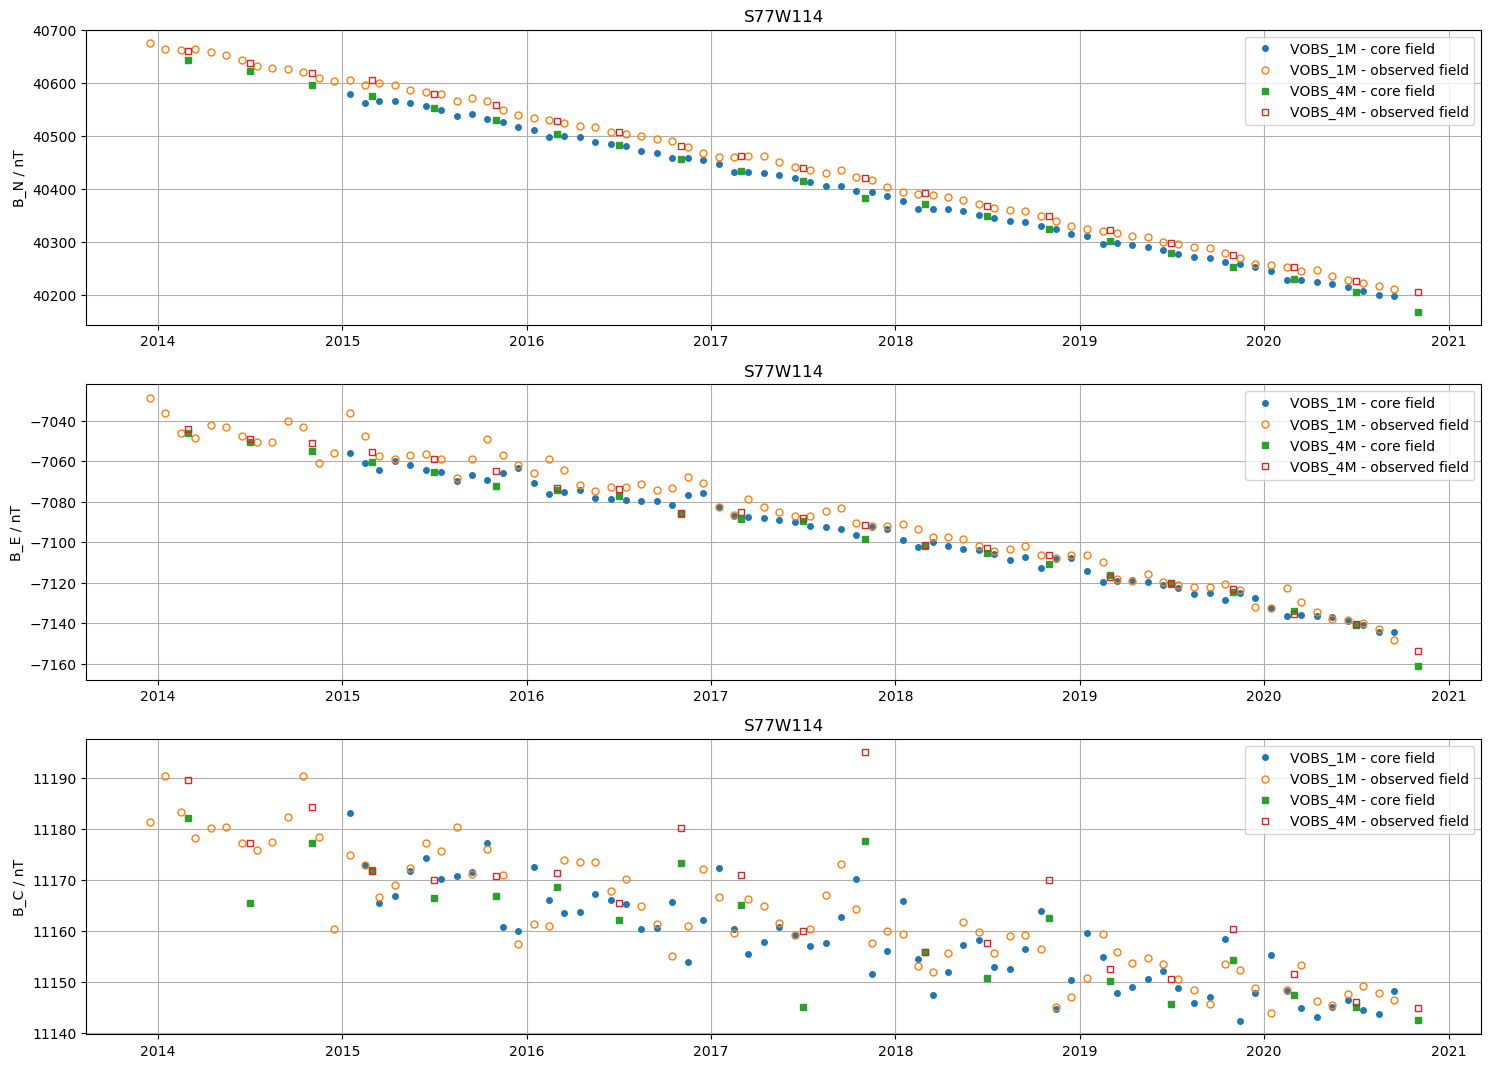

In [7]:
from datetime import datetime

site = 'S77W114'

collection = 'SW_OPER_VOBS_1M_2_'
request = SwarmRequest(server_url)
request.set_collection(f'{collection}:{site}')
request.set_products(
    measurements=VOBS_VARIABLES,
    auxiliaries=['QDLat', 'QDLon'],
)
data_1m = request.get_between(
    start_time='2013-01-01T10:00:00Z',
    end_time=datetime.now(),
    asynchronous=False,
).as_xarray()
print(data_1m)

# ---------

collection = 'SW_OPER_VOBS_4M_2_'
request = SwarmRequest(server_url)
request.set_collection(f'{collection}:{site}')
request.set_products(
    measurements=VOBS_VARIABLES,
    auxiliaries=['QDLat', 'QDLon'],
)
data_4m = request.get_between(
    start_time='2013-01-01T10:00:00Z',
    end_time=datetime.now(),
    asynchronous=False,
).as_xarray()
print(data_4m)

%matplotlib inline
fig = figure(figsize=(18, 18), dpi=100)

ax = subplot(4, 1, 2)
h_cf_1m, = ax.plot(data_1m['Timestamp'].values, data_1m['B_CF'].values[:, 0], 'o', ms=4)
h_ob_1m, = ax.plot(data_1m['Timestamp'].values, data_1m['B_OB'].values[:, 0], 'o', ms=5, mfc='none')
h_cf_4m, = ax.plot(data_4m['Timestamp'].values, data_4m['B_CF'].values[:, 0], 's', ms=4)
h_ob_4m, = ax.plot(data_4m['Timestamp'].values, data_4m['B_OB'].values[:, 0], 's', ms=5, mfc='none')

ax.set_title(site)
ax.set_ylabel('B_N / nT')
ax.grid()
ax.legend(
    [h_cf_1m, h_ob_1m, h_cf_4m, h_ob_4m],
    ['VOBS_1M - core field', 'VOBS_1M - observed field', 'VOBS_4M - core field', 'VOBS_4M - observed field']
)

ax = subplot(4, 1, 3)
h_cf_1m, = ax.plot(data_1m['Timestamp'].values, data_1m['B_CF'].values[:, 1], 'o', ms=4)
h_ob_1m, = ax.plot(data_1m['Timestamp'].values, data_1m['B_OB'].values[:, 1], 'o', ms=5, mfc='none')
h_cf_4m, = ax.plot(data_4m['Timestamp'].values, data_4m['B_CF'].values[:, 1], 's', ms=4)
h_ob_4m, = ax.plot(data_4m['Timestamp'].values, data_4m['B_OB'].values[:, 1], 's', ms=5, mfc='none')

ax.set_title(site)
ax.set_ylabel('B_E / nT')
ax.grid()
ax.legend(
    [h_cf_1m, h_ob_1m, h_cf_4m, h_ob_4m],
    ['VOBS_1M - core field', 'VOBS_1M - observed field', 'VOBS_4M - core field', 'VOBS_4M - observed field']
)

ax = subplot(4, 1, 4)
h_cf_1m, = ax.plot(data_1m['Timestamp'].values, data_1m['B_CF'].values[:, 2], 'o', ms=4)
h_ob_1m, = ax.plot(data_1m['Timestamp'].values, data_1m['B_OB'].values[:, 2], 'o', ms=5, mfc='none')
h_cf_4m, = ax.plot(data_4m['Timestamp'].values, data_4m['B_CF'].values[:, 2], 's', ms=4)
h_ob_4m, = ax.plot(data_4m['Timestamp'].values, data_4m['B_OB'].values[:, 2], 's', ms=5, mfc='none')

ax.set_title(site)
ax.set_ylabel('B_C / nT')
ax.grid()
ax.legend(
    [h_cf_1m, h_ob_1m, h_cf_4m, h_ob_4m],
    ['VOBS_1M - core field', 'VOBS_1M - observed field', 'VOBS_4M - core field', 'VOBS_4M - observed field']
)
